In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Generic imports
import numpy as np
from numpy.testing import assert_allclose
import matplotlib.pyplot as plt
from ase import Atoms
from scipy.interpolate import bisplev, RectBivariateSpline, splev, make_interp_spline

# Imports specific to pyLODE
from pylode.lib.projection_coeffs import DensityProjectionCalculator
from pylode.lib.projection_coeffs_realspace import DensityProjectionCalculator_Realspace

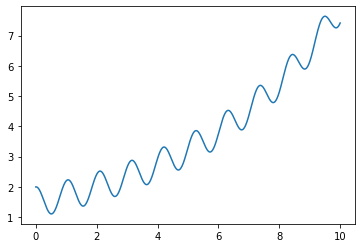

In [3]:
xx = np.linspace(0, 10, 1000)
yy = np.cos(3*xx)**2 + np.exp(0.2 * xx)
plt.plot(xx, yy)

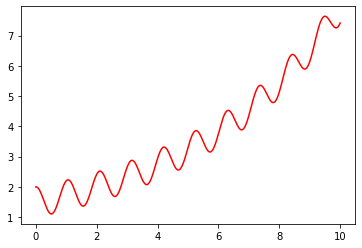

In [4]:
spl = make_interp_spline(xx, yy, 3)
assert_allclose(spl(xx), yy, rtol=1e-6)
plt.plot(xx, spl(xx), 'r')

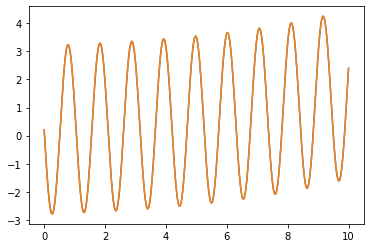

In [5]:
plt.plot(xx, spl(xx, 1))
dy = -6 * np.sin(3*xx) * np.cos(3*xx) + 0.2 * np.exp(0.2*xx)
plt.plot(xx, dy)
assert_allclose(dy, spl(xx,1), rtol=2e-3)

# Compare real space implementation against reciprocal space

In [6]:
frames = []
cell = np.eye(3) * 16
Ndimers = 15
distances = np.linspace(1., 2.5, Ndimers)
for d in distances:
    positions = [[1,1,1],[1,1,1+d]]
    frame = Atoms('O2', positions=positions, cell=cell, pbc=True)
    frames.append(frame)

In [7]:
nmax = 8
lmax = 3
rcut = 6.
smearing = 0.7

In [8]:
hypers = {
    'smearing':smearing,
    'max_angular':lmax,
    'max_radial':nmax,
    'cutoff_radius':rcut,
    'potential_exponent':0,
    'radial_basis': 'gto',
    'compute_gradients':False,
    'subtract_center_contribution':False,
    }

calculator_pylode = DensityProjectionCalculator(**hypers)
calculator_pylode.transform(frames)
features_pylode = calculator_pylode.features

In [9]:
calculator_realspace = DensityProjectionCalculator_Realspace(**hypers)
calculator_realspace.transform(frames)
features_realspace = calculator_realspace.features

Start real space implementation
Frame number =  0
Frame number =  1
Frame number =  2
Frame number =  3
Frame number =  4
Frame number =  5
Frame number =  6
Frame number =  7
Frame number =  8
Frame number =  9
Frame number =  10
Frame number =  11
Frame number =  12
Frame number =  13
Frame number =  14


In [10]:
np.round(features_pylode[0,0,:,1:], 8)

array([[ 0.0000000e+00,  2.8110529e-01,  0.0000000e+00,  0.0000000e+00,
        -0.0000000e+00,  1.0398925e-01,  0.0000000e+00, -0.0000000e+00,
        -0.0000000e+00,  0.0000000e+00, -0.0000000e+00,  2.9445140e-02,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  4.5761955e-01,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.4303198e-01,  0.0000000e+00, -0.0000000e+00,
        -0.0000000e+00, -0.0000000e+00, -0.0000000e+00,  8.8544190e-02,
         0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
       [-0.0000000e+00,  3.3765856e-01,  0.0000000e+00, -0.0000000e+00,
        -0.0000000e+00,  2.4865387e-01, -0.0000000e+00, -0.0000000e+00,
        -0.0000000e+00, -0.0000000e+00, -0.0000000e+00,  1.3140668e-01,
         0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  6.7923190e-02,  0.0000000e+00, -0.0000000e+00,
        -0.0000000e+00,  4.8850210e-02, -0.0000000e+00, -0.0000000e+00,
        -0.0000000e+00, -0.0000000e+0

In [11]:
np.round(features_realspace[0,0,:,1:], 8)

array([[ 0.0000000e+00,  2.8098392e-01,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  1.0400146e-01,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  2.9712950e-02,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  4.5771291e-01,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.4302544e-01,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  8.8575300e-02,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  3.3763038e-01,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.4866442e-01,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.3136837e-01,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  6.7954990e-02,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  4.8831780e-02,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+0

In [12]:
hypers_realspace = {
    'smearing':smearing,
    'max_angular':lmax,
    'max_radial':1,
    'cutoff_radius':rcut,
    'potential_exponent':1,
    'radial_basis': 'monomial',
    'compute_gradients':False,
    'subtract_center_contribution':False,
    }

In [13]:
calculator_realspace = DensityProjectionCalculator_Realspace(**hypers_realspace)
calculator_realspace.transform(frames)
features_realspace = calculator_realspace.features

Start real space implementation


AttributeError: 'RadialBasis' object has no attribute 'normalizations'